In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons , make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# create a non - linear toy data
X , y = make_moons(n_samples = 400 , noise = 0.25 , random_state = 42)

# hard linear data
# X , y = make_circles(n_samples = 400 , noise = 0.18 , factor = 0.4 , random_state = 42)

In [3]:
# print shape of data
print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [4]:
# scale features - RBF & sigmoid
scaler = StandardScaler()
X = scaler.fit_transform(X)

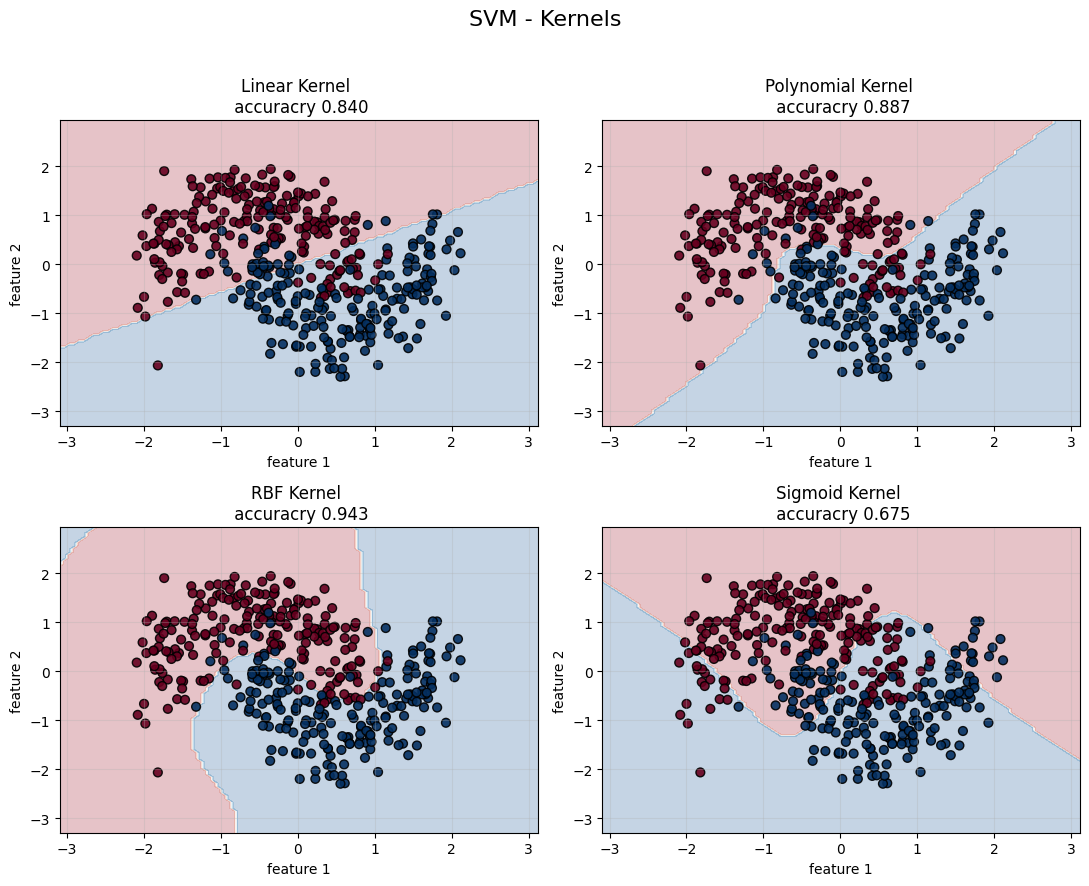

In [15]:
# plot  grid
fig , axes = plt.subplots(2 , 2 , figsize = (11 , 9))
fig.suptitle("SVM - Kernels" , fontsize = 16)

# compare four kernels
kernels = [
    
    ("linear" ,    "Linear Kernel" ,  dict(C=1.0)),
    ("poly" ,      "Polynomial Kernel" , dict(C=1.0 , degree= 3 , gamma = "scale" , coef0 = 0.1)),
    ("rbf" ,       "RBF Kernel" , dict(C=5.0 , gamma = 'scale')),
    ("sigmoid" ,   "Sigmoid Kernel" , dict(gamma = 'scale' , coef0 = 0.1, C=1.0))

]

for ax , (kernel_name , title , params) in zip(axes.flat,kernels):
    # train 
    clf = SVC(kernel = kernel_name , **params , random_state=42)
    clf.fit(X,y)
    
    # plot decision boundary + point 
    disp = DecisionBoundaryDisplay.from_estimator(
        clf, X ,
        response_method = "predict",
        cmap = plt.cm.RdBu,
        alpha = 0.25,
        ax = ax
    )
    
    disp.ax_.scatter(X[:,0],X[:,1], c = y , edgecolors="k",s=40,cmap=plt.cm.RdBu,alpha=0.9)
    # title 
    acc = accuracy_score(y,clf.predict(X))
    ax.set_title(f'{title} \n accuracry {acc:.3f}',fontsize=12)
    ax.set_xlabel("feature 1")
    ax.set_ylabel("feature 2")
    ax.grid(alpha=0.3)
plt.tight_layout(rect=[0,0,1,0.96])    
plt.show()
    